# **Exercises about real gases**

In [1]:
# Loading the necessary packages to solve the exercises
import numpy as np
from scipy.integrate import simps
from scipy.integrate import trapz
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Exercise 1)

Determine $ \phi$ and the fugacity of $O_2(g)$ at 1000 bar and 0ºC from the following data:

|   |   |   |   |   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|---|---|---|---|
|p(bar)   |  1 | 100  | 200  | 300  | 400  | 500  | 600  | 700  | 800  | 900  | 1000  |
|$V_m$ (L/mol)   | 22.710  | 0.2098  | 0.1045  | 0.0715  | 0.0601  | 0.0527  | 0.0471  | 0.0443  | 0.0420  | 0.0403  | 0.0.384  |

## Solution

For real gases: $ ln\phi = \int_{0}^{p} \frac{Z-1}{p} dp$

$Z = \frac{V_m}{V_{m,id}} = \frac{pV_m}{RT}$

Using the definition of Z in the first equation:

$ ln\phi = \int_{0}^{p} (\frac{V_m}{RT} -\frac{1}{p})dp$

The area under the  $(\frac{V_m}{RT} -\frac{1}{p})$ versus p curve is exactly $ln \phi$.

In [2]:
#Arrays containing the data
p = np.array([1.,100., 200., 300., 400., 500., 600., 700., 800., 900., 1000.])
V = np.array([22.710, 0.2098, 0.1045, 0.0715, 0.0601, 0.0527, 0.0471, 0.0443, 0.0420, 0.0403, 0.0384])

R = 0.08314   # L bar / K mol
T = 273.15    # K
pi = 1000.0    # bar

y = V/(R*T) - 1/p

#At this point the student can choose the desired integration method

ln_phi = simps(y, p)  # numerical integration using the Simpson's rule

#ln_phi = trapz(ordenada, p)  # numerical integration using the composite trapezoidal rule



#Calculation of fugacity coeficient and fugacity
phi = np.exp(ln_phi) 
f = pi * phi


print('Fugacity coeficient = ' + format(phi , '6.3f'))
print('Fugacity (bar) = ' + format(f, '6.3e'))

Fugacity coeficient =  1.161
Fugacity (bar) = 1.161e+03


<function matplotlib.pyplot.show>

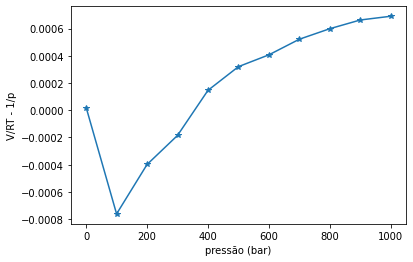

In [ ]:
#The graph will be built only by illustrative purposes.

plt.plot(p,y,'-*')
plt.xlabel('pressão (bar)')
plt.ylabel('V/RT - 1/p')
plt.show

## Exercise 2)

The compressibility factor of  $O_2(g)$ at low pressures and 0ºC is a linear function, as can be seen by the below data. Calculate $B_p$ para o $O_2(g)$ in this conditions.

|   |   |   |   |   |   | 
|---|---|---|---|---|---|
|p(bar)   |  1. | 2.00  | 3.00  | 4.00  | 5.00  |
|Z| 1.0000  | 0.9990  | 0.9980  | 0.9971  | 0.9961  |

## Solution

The virial expansion is truncated in the second term is $ Z = 1 + (B_p /RT) p$. A plot of  Z versus p has slope equal  $\frac{B_p}{RT}$.

In [3]:
# Defining the variables 
R = 0.08314   # bar L / K mol
T = 273.15    # K

p = np.array([1.,2.00, 3.00, 4.00, 5.00])
Z = np.array([1.0000, 0.9990, 0.9980, 0.9971, 0.9961])

#Linear fit
deg = 1
z = np.polyfit(p, Z, deg)
y = np.poly1d(z)

#Bp calculation
Bp = z[0]*R*T

print('Bp (L/mol)= ' + format(Bp , '6.3f'))

Bp (L/mol)= -0.022


<function matplotlib.pyplot.show>

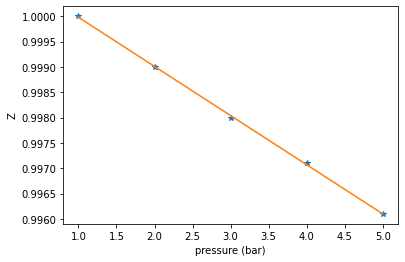

In [4]:
#The graph will be built only by illustrative purposes.

plt.plot(p,Z,'*')
plt.plot(p,y(p))
plt.xlabel('pressure (bar)')
plt.ylabel('Z')
plt.show

## Exercise 3)

In the Boyle's temeperature, a Z versus p plot for a real gas is tangent to the ideal gas curve at p = 0, and raises gradually at values higher than Z = 1. Obtain an equation for the Boyle's temperature using  $Z = 1 + \frac{B_p}{RT}p + \frac{C_p}{RT}p^2 + ...$, and calcualte the this temperature for  $O_2(g)$ using the below data.

|   | |  |   |   |   |   | 
|:---:|:---|:---:|:---:|:---:|:---:|:---:|
|T(K)    | |350 | 400  | 450  | 500  | 550  |
|$\frac{B_v}{RT}(cm^3 mol^{-1})$||  -7.27  | -1.85  | 1.87  | 4.65  | 7.23  |


## Solution

The series will be truncated in the second term and the derivative in functions of p calculated:
$$ \frac{\partial Z}{\partial p} = \frac{B_p}{RT} = \frac{B_v/RT}{RT} $$
It was considered $B_p = \frac{B_v}{RT}$.

It was informed that  $ \frac{\partial Z}{\partial p} = 0 $, by this reason in Boyle's temperature the second virial coefficient is  0. A function can be fitted and the roots of the function determined. In this problem, a second-degree function will be fitted.



In [11]:
# Defining the variables
R = 0.08314   # bar L / K mol


T = np.array([350., 400.0, 450., 500., 550.])
Bv = np.array([-7.27, -1.85, 1.87, 4.65, 7.23])

Bp = Bv/(R*T*1000)

#Fitting the second-degree equation
deg = 2
z = np.polyfit(T, Bp, deg)
y = np.poly1d(z)


#Calculate and print the roots of the function.

root = np.roots(z)
print('Roots of the function (K) are :', root )



Roots of the function (K) are : [676.10774971 426.56601066]


<function matplotlib.pyplot.show>

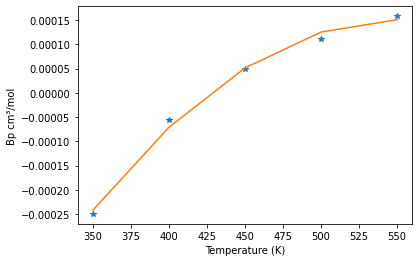

In [12]:
#The plot of data points will be constructed in order to investigate what value
# the second virial coefficient is  equal 0

plt.plot(T,Bp,'*')
plt.plot(T,y(T))
plt.xlabel('Temperature (K)')
plt.ylabel('Bp cm³/mol')
plt.show

The graph analysis shows that the second root corresponds to Boyle's temperature: 426.6 K.